###Codigo e implementación https://github.com/Psychofun/Red-Neuronal-Numpy
Autor: PsyFun
##Preprocesamiento de los datos, para estandarizar ("gre","gpa") e individualizar la caracteristica categorica "rank"

In [24]:
from google.colab import files
uploaded = files.upload()

Saving binary.csv to binary (1).csv


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

admissions = pd.read_csv(io.BytesIO(uploaded['binary.csv']))                    #O(1)
print(admissions.describe())                                                    #O(1)
print(admissions.shape)                                                         #O(1)
print(admissions.head())                                                        #O(1)

            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000
(400, 4)
   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


#Conversion de una variable categorica "rank" a variables binarias "rank_1","rank_2","rank_3", "rank_4"

In [26]:
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)  #O(1)
print(data.describe())                                                                     #O(1)
data = data.drop('rank', axis=1)                                                           #O(1)
print(data.shape)                                                                          #O(1)
print(data.head())                                                                         #O(1)

            admit         gre         gpa       rank      rank_1      rank_2  \
count  400.000000  400.000000  400.000000  400.00000  400.000000  400.000000   
mean     0.317500  587.700000    3.389900    2.48500    0.152500    0.377500   
std      0.466087  115.516536    0.380567    0.94446    0.359955    0.485369   
min      0.000000  220.000000    2.260000    1.00000    0.000000    0.000000   
25%      0.000000  520.000000    3.130000    2.00000    0.000000    0.000000   
50%      0.000000  580.000000    3.395000    2.00000    0.000000    0.000000   
75%      1.000000  660.000000    3.670000    3.00000    0.000000    1.000000   
max      1.000000  800.000000    4.000000    4.00000    1.000000    1.000000   

           rank_3      rank_4  
count  400.000000  400.000000  
mean     0.302500    0.167500  
std      0.459916    0.373889  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    0.000000  
max      1.000000    1.

Estandarizacion de las variables ("gre","gpa")

In [27]:
# Standarize features
for field in ['gre', 'gpa']:                                   #O(n)
    mean, std = data[field].mean(), data[field].std()          #O(1)
    data.loc[:,field] = (data[field]-mean)/std                 #O(1)
print(data.shape)                                              #O(1)
print(data.describe())                                         #O(1)

(400, 7)
            admit           gre           gpa      rank_1      rank_2  \
count  400.000000  4.000000e+02  4.000000e+02  400.000000  400.000000   
mean     0.317500 -3.907985e-16  2.198242e-16    0.152500    0.377500   
std      0.466087  1.000000e+00  1.000000e+00    0.359955    0.485369   
min      0.000000 -3.183094e+00 -2.968993e+00    0.000000    0.000000   
25%      0.000000 -5.860633e-01 -6.829288e-01    0.000000    0.000000   
50%      0.000000 -6.665712e-02  1.340106e-02    0.000000    0.000000   
75%      1.000000  6.258844e-01  7.360075e-01    0.000000    1.000000   
max      1.000000  1.837832e+00  1.603135e+00    1.000000    1.000000   

           rank_3      rank_4  
count  400.000000  400.000000  
mean     0.302500    0.167500  
std      0.459916    0.373889  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    0.000000  
max      1.000000    1.000000  


dividir el conjunto de datos para entrenamiento y evaluación del modelo

In [28]:
print(data.index)          #O(1)

RangeIndex(start=0, stop=400, step=1)


In [29]:
# Split off random 10% of the data for testing
np.random.seed(21)                                                              #O(1)

sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)   #O(1)
train_data, test_data = data.iloc[sample], data.drop(sample)                    #O(1)
print(train_data.shape)                                                         #O(1)
print(test_data.shape)                                                          #O(1)

(360, 7)
(40, 7)


División de los datos en caracteristicas y etiquetas

In [30]:
features, targets = train_data.drop('admit', axis=1), train_data['admit']                     #O(1)
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']             #O(1)     

Función de Activación

In [31]:
def sigmoide(x):
    return 1/(1 + np.exp(-x))

Entrenamiento:\
Punto #2 \
Complejidad : 

*   9*O(1) + O(n)[2*O(1) + O(n)[6*O(1)] + 8*O(1)] + 5*O(1)
*   O(n^2)

Los parametros que más afectan el tiempo de ejecicion del entrenamiento son el número de iteraciones y el tamaño de datos que se muestran (train_data) ya que de estos depende la ejecucion de los ciclos for y por tanto entre mas grandes sean, mas tiempo de ejecución llevará el algoritmo de entrenamiento.






In [ ]:
# Hyperparameters
n_hidden = 2 # Número de unidades en la capa escondida                                                 #O(1)
epochs = 1000000000 # Número de iteraciones sobre el conjunto de entrenamiento                               #O(1)
alpha = 0.01 # Taza de aprendizaje                                                                     #O(1)

ult_costo = None                                                                                       #O(1)

m,k = features.shape # Número de ejemplos de entrenamiento, número de dimensiones en los datos         #O(1)
# Inicialización de los pesos
entrada_escondida = np.random.normal(scale = 1/k**0.5,size = (k,n_hidden))                             #O(1)
escondida_salida = np.random.normal(scale = 1/k**0.5,size = n_hidden)                                  #O(1)
print(entrada_escondida.shape)                                                                         #O(1)
print(escondida_salida.shape)                                                                          #O(1)
# Entrenamiento
for e in range(epochs):                                                                                #O(n)
    # Variables para el gradiente
    gradiente_entrada_escondida = np.zeros(entrada_escondida.shape)                                    #O(1)
    gradiente_escondida_salida =  np.zeros(escondida_salida.shape)                                     #O(1)
    # Itera sobre el conjunto de entrenamiento
    for x,y in zip(features.values,targets):                                                           #O(n)
        # Pasada hacia adelande (forward pass) or forward propagation
        z = sigmoide(np.matmul(x, entrada_escondida))                                                  #O(1)
        y_ =sigmoide(np.matmul(escondida_salida,z)) # predicción                                       #O(1)
        # Pasada hacia atrás (backward pass)
        salida_error = (y - y_) * y_ *(1- y_) #error * derivada de la funcion sigmoide                 #O(1)
        escondida_error = np.dot(salida_error, escondida_salida) * z * (1 -z)                          #O(1)

        gradiente_entrada_escondida += escondida_error * x[:,None]                                     #O(1)
        gradiente_escondida_salida += salida_error * z                                                 #O(1)
    # Actualiza los parámetros (pesos)
    entrada_escondida += alpha * gradiente_entrada_escondida / m  #alpha = tasa de aprendizaje         #O(1)
    escondida_salida +=  alpha * gradiente_escondida_salida / m                                        #O(1)

    if e % (epochs / 10 ) == 0:                                                                        #O(1)
        z = sigmoide(np.dot(features.values, entrada_escondida))                                       #O(1)
        y_ = sigmoide(np.dot(z, escondida_salida))                                                     #O(1)

        # Función de costo
        costo = np.mean(( y_ - targets)**2 )                                                           #O(1)

        if ult_costo  and ult_costo < costo:                                                           #O(1)
            print("Costo de  entrenamiento: ", costo, " ADVERTENCIA -  Costo subiendo")                #O(1)
        else:
            print("Costo de entrenamiento: ", costo )                                                  #O(1)
        
        ult_costo = costo                                                                              #O(1)

#  Precisión en los datos de prueba 
z = sigmoide(np.dot(features_test, entrada_escondida))                                                 #O(1)
y_ = sigmoide(np.dot(z, escondida_salida))                                                             #O(1)

predicciones =  y_ > 0.5                                                                               #O(1)
precision = np.mean(predicciones == targets_test)                                                      #O(1)
print("Precisión: {:.3f}".format(precision))                                                           #O(1)




(6, 2)
(2,)
Costo de entrenamiento:  0.2527453489542154


Punto #3

In [40]:
epochs = 50 # Número de iteraciones sobre el conjunto de entrenamiento   #O(1) 
precisions=[] 
# Inicialización de los pesos
entradas_escondidas = []  
entradas_escondidas.append(np.random.normal(scale = 1/k**0.5,size = (k,n_hidden)))                         #O(1)
escondidas_salidas = []
escondidas_salidas.append(np.random.normal(scale = 1/k**0.5,size = n_hidden))   

                                                         #O(1)
for i in range (epochs):
  # Hyperparameters
  n_hidden = 2 # Número de unidades en la capa escondida                                                 #O(1)
  alpha = 0.01 # Taza de aprendizaje                                                                     #O(1)
  ult_costo = None                                                                                       #O(1)

  m,k = features.shape # Número de ejemplos de entrenamiento, número de dimensiones en los datos         #O(1)
  escondida_salida = escondidas_salidas[i-1]
  entrada_escondida = entradas_escondidas[i-1]
                                 
  # print(entrada_escondida.shape)                                                                         #O(1)
  # print(escondida_salida.shape)                                                                          #O(1)
  # Entrenamiento
  for e in range(i):                                                                                #O(n)
      # Variables para el gradiente
      gradiente_entrada_escondida = np.zeros(entrada_escondida.shape)                                    #O(1)
      gradiente_escondida_salida =  np.zeros(escondida_salida.shape)                                     #O(1)
      # Itera sobre el conjunto de entrenamiento
      for x,y in zip(features.values,targets):                                                           #O(n)
          # Pasada hacia adelande (forward pass) or forward propagation
          z = sigmoide(np.matmul(x, entrada_escondida))                                                  #O(1)
          y_ =sigmoide(np.matmul(escondida_salida,z)) # predicción                                       #O(1)
          # Pasada hacia atrás (backward pass)
          salida_error = (y - y_) * y_ *(1- y_) #error * derivada de la funcion sigmoide                 #O(1)
          escondida_error = np.dot(salida_error, escondida_salida) * z * (1 -z)                          #O(1)

          gradiente_entrada_escondida += escondida_error * x[:,None]                                     #O(1)
          gradiente_escondida_salida += salida_error * z                                                 #O(1)
      # Actualiza los parámetros (pesos)
      entrada_escondida += alpha * gradiente_entrada_escondida / m  #alpha = tasa de aprendizaje         #O(1)
      escondida_salida +=  alpha * gradiente_escondida_salida / m 
      
      entradas_escondidas.append(entrada_escondida)   
      escondidas_salidas.append(escondida_salida)                                    #O(1)

      if e % (i / 10 ) == 0:                                                                        #O(1)
          z = sigmoide(np.dot(features.values, entrada_escondida))                                       #O(1)
          y_ = sigmoide(np.dot(z, escondida_salida))                                                     #O(1)

          # Función de costo
          costo = np.mean(( y_ - targets)**2 )                                                           #O(1)

          # if ult_costo  and ult_costo < costo:                                                           #O(1)
          #     print("Costo de  entrenamiento: ", costo, " ADVERTENCIA -  Costo subiendo")                #O(1)
          # else:
          #     print("Costo de entrenamiento: ", costo )                                                  #O(1)
          
          ult_costo = costo                                                                              #O(1)

  #  Precisión en los datos de prueba 
  z = sigmoide(np.dot(features_test, entrada_escondida))                                                 #O(1)
  y_ = sigmoide(np.dot(z, escondida_salida))                                                             #O(1)

  predicciones =  y_ > 0.5                                                                               #O(1)
  precision = np.mean(predicciones == targets_test)                                                      #O(1)
  precisions.append(precision)

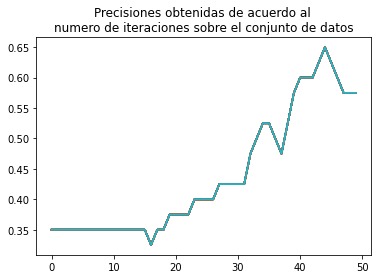

In [41]:
y_axis = []
x_axis=np.arange(0,epochs,1)

for num in precisions:
    y_axis.append(num)

#Graficamos la poblacion Inicial
for i in range (len(precisions)):                               
  x = i                             
  y = precisions[i]                                 
  plt.plot(x,y,'-')                                       
  plt.plot(x_axis,y_axis)                                
titulo="Precisiones obtenidas de acuerdo al \nnumero de iteraciones sobre el conjunto de datos"                              
plt.title(titulo)                                        
plt.show()                                               
print()                                                  

Punto #4

In [ ]:
#Funcion de activacion tanh
def tanh(x):
    return np.tanh(x)

In [ ]:
#Derivada de funcion de activacion tanh
def Diftanh(x):
    return 1-tanh(x)**2

In [ ]:
# Hyperparameters
n_hidden = 2 # Número de unidades en la capa escondida                                                 #O(1)
epochs = 1000 # Número de iteraciones sobre el conjunto de entrenamiento                               #O(1)
alpha = 0.01 # Taza de aprendizaje                                                                     #O(1)

ult_costo = None                                                                                       #O(1)

m,k = features.shape # Número de ejemplos de entrenamiento, número de dimensiones en los datos         #O(1)
# Inicialización de los pesos
entrada_escondida = np.random.normal(scale = 1/k**0.5,size = (k,n_hidden))                             #O(1)
escondida_salida = np.random.normal(scale = 1/k**0.5,size = n_hidden)                                  #O(1)
print(entrada_escondida.shape)                                                                         #O(1)
print(escondida_salida.shape)                                                                          #O(1)
# Entrenamiento
for e in range(epochs):                                                                                #O(n)
    # Variables para el gradiente
    gradiente_entrada_escondida = np.zeros(entrada_escondida.shape)                                    #O(1)
    gradiente_escondida_salida =  np.zeros(escondida_salida.shape)                                     #O(1)
    # Itera sobre el conjunto de entrenamiento
    for x,y in zip(features.values,targets):                                                           #O(n)
        # Pasada hacia adelande (forward pass) or forward propagation
        z  = tanh(np.matmul(x, entrada_escondida))                                                     #O(1)
        y_ = tanh(np.matmul(escondida_salida,z)) # predicción                                          #O(1)
        # Pasada hacia atrás (backward pass)
        #error * derivada de la funcion tanh
        salida_error = (y - y_) * y_ *  Diftanh(np.matmul(escondida_salida,z))                         #O(1)
        escondida_error = np.dot(salida_error, escondida_salida) * z * Diftanh(np.matmul(x, entrada_escondida))    #O(1)

        gradiente_entrada_escondida += escondida_error * x[:,None]                                     #O(1)
        gradiente_escondida_salida += salida_error * z                                                 #O(1)
    # Actualiza los parámetros (pesos)
    entrada_escondida += alpha * gradiente_entrada_escondida / m  #alpha = tasa de aprendizaje         #O(1)
    escondida_salida +=  alpha * gradiente_escondida_salida / m                                        #O(1)

    if e % (epochs / 10 ) == 0:                                                                        #O(1)
        z = tanh(np.dot(features.values, entrada_escondida))                                       #O(1)
        y_ = tanh(np.dot(z, escondida_salida))                                                     #O(1)

        # Función de costo
        costo = np.mean(( y_ - targets)**2 )                                                           #O(1)

        if ult_costo  and ult_costo < costo:                                                           #O(1)
            print("Costo de  entrenamiento: ", costo, " ADVERTENCIA -  Costo subiendo")                #O(1)
        else:
            print("Costo de entrenamiento: ", costo )                                                  #O(1)
        
        ult_costo = costo                                                                              #O(1)

#  Precisión en los datos de prueba 
z = sigmoide(np.dot(features_test, entrada_escondida))                                                 #O(1)
y_ = sigmoide(np.dot(z, escondida_salida))                                                             #O(1)

predicciones =  y_ > 0.5                                                                               #O(1)
precision = np.mean(predicciones == targets_test)                                                      #O(1)
print("Precisión: {:.3f}".format(precision))  

(6, 2)
(2,)
Costo de entrenamiento:  0.3635322983467658
Costo de  entrenamiento:  0.37260530857265023  ADVERTENCIA -  Costo subiendo
Costo de  entrenamiento:  0.3835279980220487  ADVERTENCIA -  Costo subiendo
Costo de  entrenamiento:  0.3967567808987751  ADVERTENCIA -  Costo subiendo
Costo de  entrenamiento:  0.4128715699423706  ADVERTENCIA -  Costo subiendo
Costo de  entrenamiento:  0.43259521760389413  ADVERTENCIA -  Costo subiendo
Costo de  entrenamiento:  0.45679193432367726  ADVERTENCIA -  Costo subiendo
Costo de  entrenamiento:  0.4864121061647151  ADVERTENCIA -  Costo subiendo
Costo de  entrenamiento:  0.5223338027145216  ADVERTENCIA -  Costo subiendo
Costo de  entrenamiento:  0.5650591255504481  ADVERTENCIA -  Costo subiendo
Precisión: 0.650


Tenemos que al cambiar la función de activación de una sigmoide a una tangente hiperbólica el costo de entrenamiento sube lo cual no es óptimo para el entrenamiento de esta red neuronal. Del mismo modo tenemos que la precision lograda es la misma que con la función sigmoide por lo tanto, es mejor hacer uso de la función sigmoide.